In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [53]:
data = pd.read_csv(r"unnati_phase1_data_revised.csv")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 6), markersize=1)

In [ ]:
data.hist(bins=25, figsize=(15, 6), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

In [ ]:
data['Date'].nunique()

In [ ]:
x = data['Alert']
y = data['Speed']

# Create a scatter plot
plt.scatter(x, y, label='Scatter Plot', color='blue')

# Add labels and a title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Scatter Plot of X and Y')

# Show a legend (if needed)
plt.legend()

# Show the plot
plt.show()


In [ ]:
sns.displot(data['Alert'])

In [ ]:
sns.displot(data['Vehicle'])

In [ ]:
sns.displot(data['Speed'])

In [ ]:
sns.displot(data['Long'])

In [ ]:
sns.jointplot(x='Vehicle',y='Speed',data=data)

In [ ]:
sns.jointplot(x='Vehicle',y='Speed',data=data,kind='reg')

In [ ]:
sns.jointplot(x='Vehicle',y='Speed',data=data,kind='kde')

In [ ]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data,hue = 'Alert')

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data)
profile.to_file(output_file='data.html')

### Analysis

In [ ]:
import datetime as dt

In [ ]:
df=data.copy()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Alert     21325 non-null  object        
 1   Date      21325 non-null  object        
 2   Time      21325 non-null  object        
 3   Lat       21325 non-null  float64       
 4   Long      21325 non-null  float64       
 5   Vehicle   21325 non-null  int64         
 6   Speed     21325 non-null  int64         
 7   DateTime  21325 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
df.head()

In [ ]:
df['DateTime']=df["Date"]+" "+df["Time"]

In [ ]:
df["DateTime"]=pd.to_datetime(df["DateTime"],format='%Y-%m-%d %H:%M:%S')

### Mapping

!pip install geopandas shapely

In [32]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [33]:
geometry = [Point(xy) for xy in zip(data['Long'], data['Lat'])]
gdf = GeoDataFrame(data, geometry = geometry)

(12.338685, 13.182797)

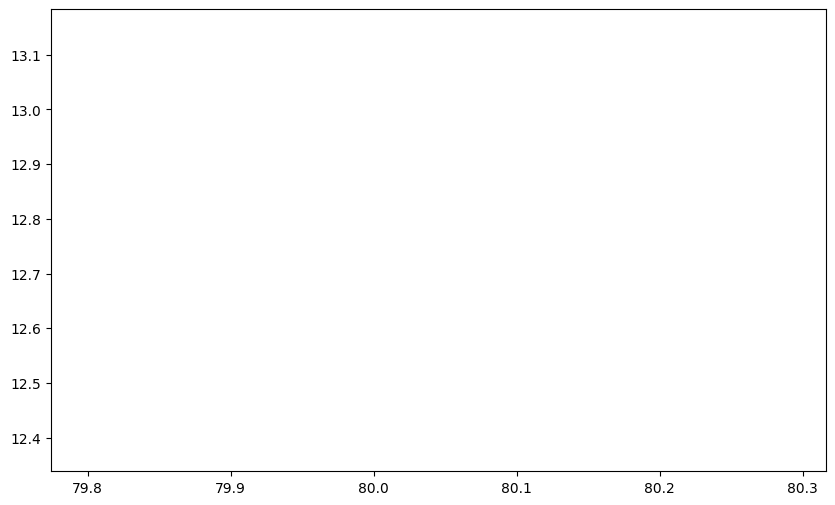

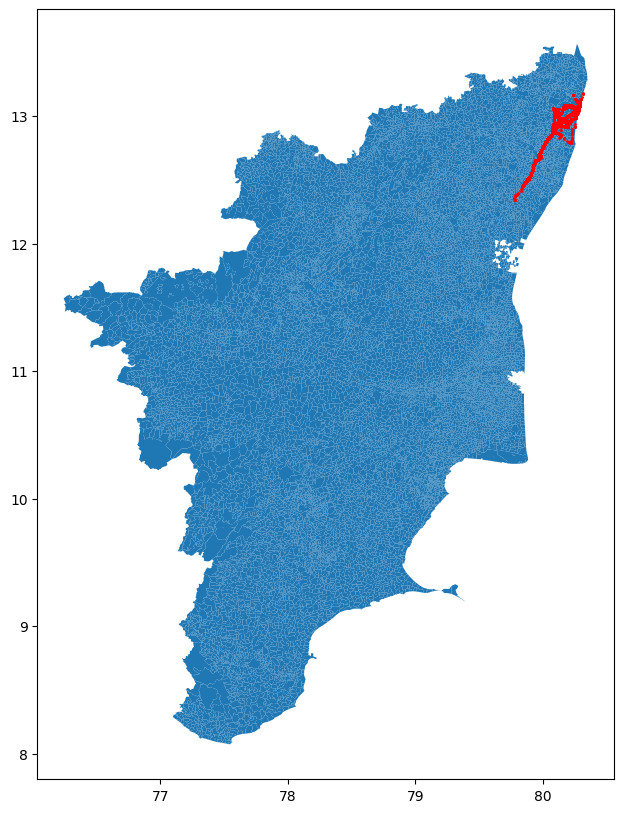

In [34]:
fig, ax = plt.subplots(figsize = (10,6))
world = gpd.read_file(r'C:\Users\akash\Desktop\nyu-2451-42207-shapefile\nyu_2451_42207.shp')
gdf.plot(ax = world.plot(figsize = (10, 10)), color = 'red', markersize = 1)
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

In [35]:
gdf.total_bounds

array([79.77412 , 12.338685, 80.316079, 13.182797])

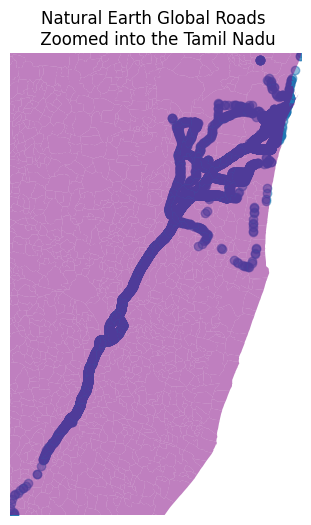

In [36]:
fig, ax = plt.subplots(figsize = (10,6))

xlim = ([gdf.total_bounds[0],  gdf.total_bounds[2]])
ylim = ([gdf.total_bounds[1], gdf.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

gdf.plot(alpha = .5, ax = ax)
world.plot(color='purple', ax=ax, alpha=.5)

ax.set(title='Natural Earth Global Roads \n Zoomed into the Tamil Nadu')
ax.set_axis_off()
plt.show()

In [37]:
!pip install cartopy

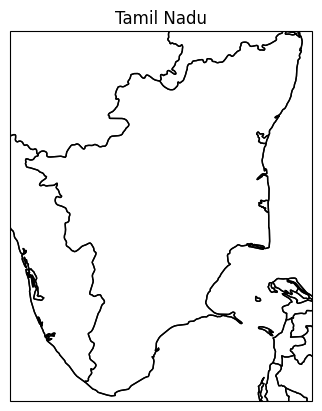

In [38]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a map projection for Tamil Nadu using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])  # Define the latitude and longitude boundaries for Tamil Nadu

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Add a title to the map
ax.set_title('Tamil Nadu')

# Show the map
plt.show()


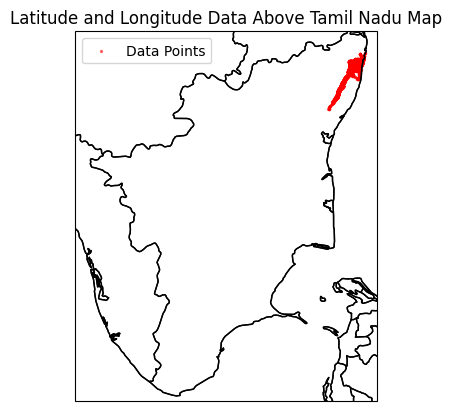

In [39]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd



# Create a map projection for Tamil Nadu using PlateCarree projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])  # Define the latitude and longitude boundaries for Tamil Nadu

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=2, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude and Longitude Data Above Tamil Nadu Map')
plt.legend()

# Show the plot
plt.show()


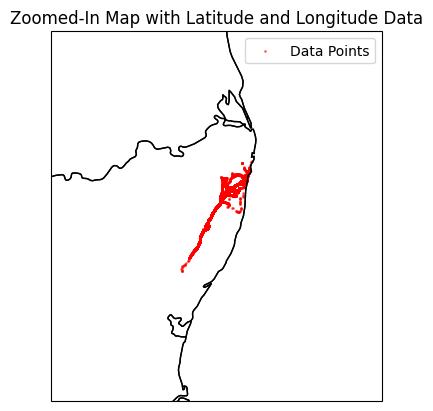

In [40]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd



# Determine the latitude and longitude boundaries based on your data
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_lon = df['Long'].min()
max_lon = df['Long'].max()

# Create a map projection centered around your data
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - 1, max_lon + 1, min_lat - 1, max_lat + 1])  # Adjust boundaries for zoom

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-In Map with Latitude and Longitude Data')
plt.legend()

# Show the plot
plt.show()


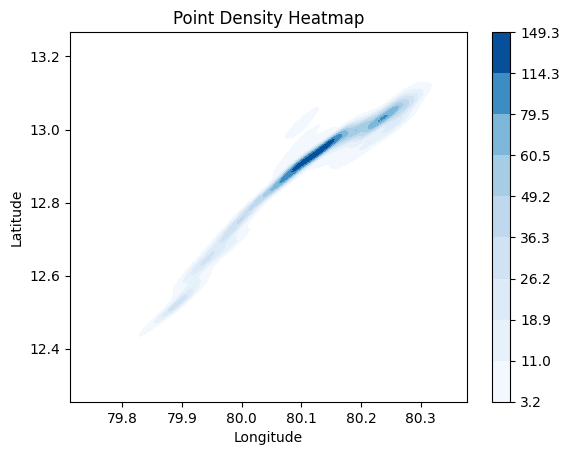

In [42]:
import seaborn as sns

# Create a heatmap of point density
sns.kdeplot(x=df['Long'], y=df['Lat'], cmap='Blues', fill=True, cbar=True)
plt.title('Point Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



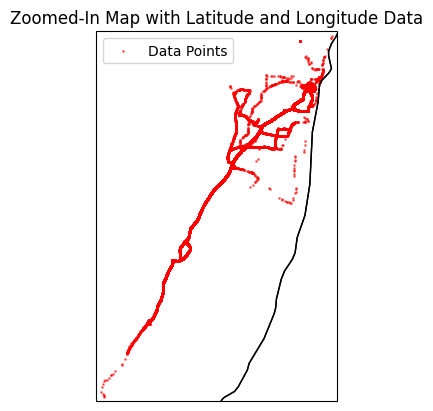

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd


# Determine the latitude and longitude boundaries based on your data
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()
min_lon = df['Long'].min()
max_lon = df['Long'].max()

# Define a margin (adjust as needed) for a tighter zoom
margin = 0.01  # Example margin of 0.1 degrees

# Create a map projection centered around your data with a tighter zoom
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - margin, max_lon + margin, min_lat - margin, max_lat + margin])

# Draw coastlines, state boundaries, and other map features
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.STATES)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed-In Map with Latitude and Longitude Data')
plt.legend()

# Show the plot
plt.show()


In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')



# Create a function to update the map based on the selected margin
def update_map(margin):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([76.0 - margin, 80.5 + margin, 8.0 - margin, 13.5 + margin])

    # Draw highways from the shapefile
    highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.2)

    # Plot your latitude and longitude data points on top of the map
    plt.scatter(df['Long'], df['Lat'], s=1, alpha=1, marker='o', color='red', label='Data Points')

    # Add labels, title, and legend
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Tamil Nadu Highways with Latitude and Longitude Data (Margin={margin:.2f})')
    plt.legend()

    # Show the plot
    plt.show()

# Create a slider widget to vary the margin
margin_slider = widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='Margin:')
widgets.interactive(update_map, margin=margin_slider)


interactive(children=(FloatSlider(value=0.1, description='Margin:', max=1.0, min=0.01, step=0.01), Output()), …

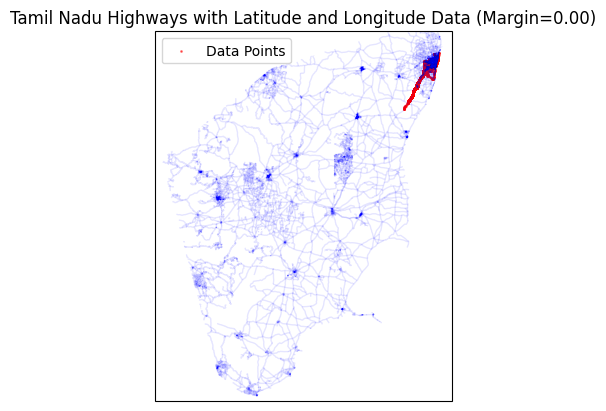

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')



# Define your desired margin (adjust as needed)
margin = 0.00001  # Example margin of 0.1 degrees

# Create a map projection centered around Tamil Nadu with the specified margin
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0 - margin, 80.5 + margin, 8.0 - margin, 13.5 + margin])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Tamil Nadu Highways with Latitude and Longitude Data (Margin={margin:.2f})')
plt.legend()

# Show the plot
plt.show()


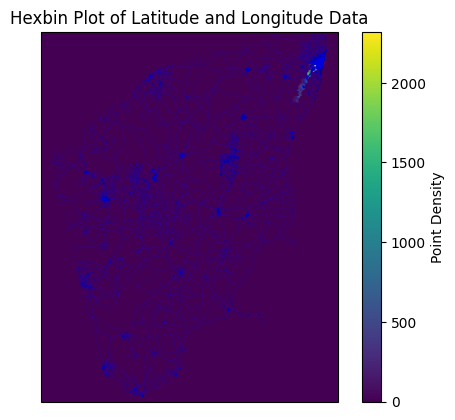

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')

# Define the map projection centered around Tamil Nadu
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([76.0, 80.5, 8.0, 13.5])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Create a hexbin plot to visualize point density
hb = ax.hexbin(df['Long'], df['Lat'], gridsize=100, cmap='viridis', extent=(76.0, 80.5, 8.0, 13.5))

# Add labels, title, and colorbar
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Latitude and Longitude Data')
plt.colorbar(hb, label='Point Density')

# Show the plot
plt.show()


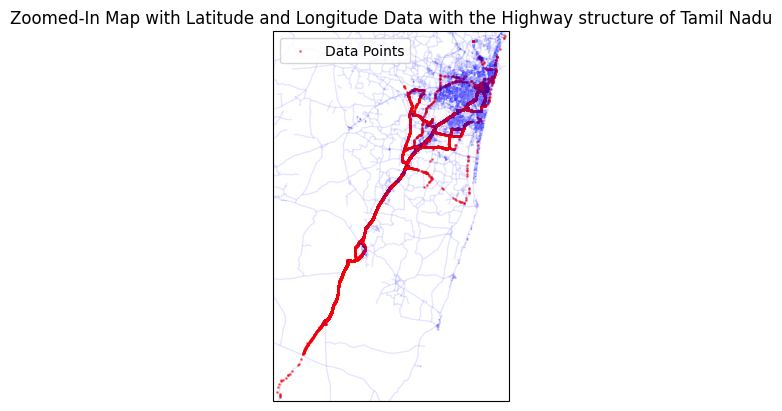

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

# Load the Tamil Nadu highways shapefile
highways = gpd.read_file(r'C:\Users\akash\Downloads\tamil_nadu_highway.shp')

# Determine the bounding box for your latitude and longitude data
min_lon = df['Long'].min()
max_lon = df['Long'].max()
min_lat = df['Lat'].min()
max_lat = df['Lat'].max()

# Calculate the margin to add around the bounding box (adjust as needed)
margin = 0.01  # Example margin of 0.01 degrees

# Create a map projection centered around the bounding box with the margin
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([min_lon - margin, max_lon + margin, min_lat - margin, max_lat + margin])

# Draw highways from the shapefile
highways.plot(ax=ax, linewidth=1, color='blue',alpha=0.1)

# Plot your latitude and longitude data points on top of the map
plt.scatter(df['Long'], df['Lat'], s=1, alpha=0.5, marker='o', color='red', label='Data Points')

# Add labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Zoomed-In Map with Latitude and Longitude Data with the Highway structure of Tamil Nadu')
plt.legend()

# Show the plot
plt.show()


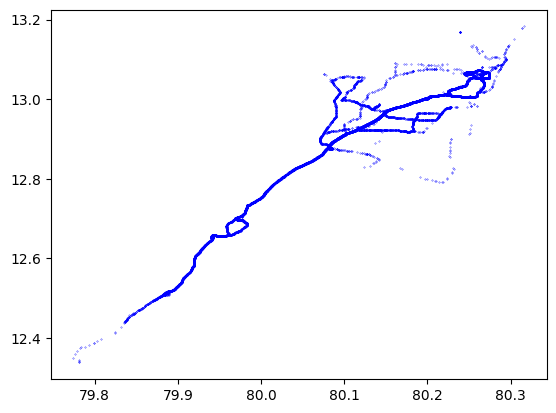

In [48]:
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [49]:


# Specify the column containing the unique values
unique_column = 'Alert'  # Replace with your actual column name

# Group the data by the unique values in the specified column
grouped = df.groupby(unique_column)

# Iterate over groups and create separate CSV files
for group_name, group_data in grouped:
    # Create a new DataFrame for the group
    group_df = pd.DataFrame(group_data)
    
    # Generate a CSV file name based on the unique value
    csv_file_name = f'{group_name}.csv'
    
    # Save the group data to the CSV file
    group_df.to_csv(csv_file_name, index=False)

# Print a message to confirm the process is complete
print("CSV files created for each unique value.")


CSV files created for each unique value.


In [54]:
data['Vehicle'].nunique()

5

In [50]:


# Specify the column containing the unique values
unique_column = 'Vehicle'  # Replace with your actual column name

# Group the data by the unique values in the specified column
grouped = df.groupby(unique_column)

# Iterate over groups and create separate CSV files
for group_name, group_data in grouped:
    # Create a new DataFrame for the group
    group_df = pd.DataFrame(group_data)
    
    # Generate a CSV file name based on the unique value
    csv_file_name = f'{group_name}.csv'
    
    # Save the group data to the CSV file
    group_df.to_csv(csv_file_name, index=False)

# Print a message to confirm the process is complete
print("CSV files created for each unique value.")


CSV files created for each unique value.


### Separate plottings
Meanings of each unique value in the alertcolumn:<br>
**FCW**: forward collision warning -improves driver alertness to rear end coliision events
<br>
**PCW**: Pedestrian collision warning - Improves driver alertness to vulnerable road users
<br>
**HMW**: Headway monitoring & Warning - Helps driver main safe distance from vehicle 
<br>
**LDW**: Lane departure warning - Promotes lane discipline (use turn indicator before changing routes)

In [ ]:
data = pd.read_csv(r"cas_fcw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [ ]:
data['Speed'].describe()

In [ ]:
filtered_data = data[data['Speed'] > 29]

# Create a count plot for the filtered data
ax = sns.countplot(data=filtered_data, x='Speed', color='blue')

In [ ]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

In [ ]:
data = pd.read_csv(r"cas_hmw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [ ]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

In [ ]:
data = pd.read_csv(r"cas_ldw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [ ]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

In [ ]:
data = pd.read_csv(r"cas_pcw.csv")
plt.plot(data.Long, data.Lat, 'b.', ms=0.5)

In [ ]:
ax = sns.countplot(data=data, x='Speed', color='blue')
plt.xticks(fontsize=5)

In [95]:
grouped_df = df.groupby('Time') 
group_df

,Alert,Date,Time,Lat,Long,Vehicle,Speed,DateTime
282,cas_hmw,2022-06-01,10:04:18,12.877598,80.084304,5339,20,2022-06-01 10:04:18
283,cas_ldw,2022-06-01,10:05:27,12.878192,80.082679,5339,45,2022-06-01 10:05:27
284,cas_ldw,2022-06-01,10:05:29,12.878192,80.082679,5339,45,2022-06-01 10:05:29
285,cas_ldw,2022-06-01,10:05:34,12.878592,80.081554,5339,44,2022-06-01 10:05:34
286,cas_hmw,2022-06-01,10:06:56,12.864632,80.074536,5339,43,2022-06-01 10:06:56
...,...,...,...,...,...,...,...,...
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30,2022-08-31 18:12:29
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34,2022-08-31 18:13:01
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24,2022-08-31 18:15:05
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23,2022-08-31 18:16:35


In [89]:
import numpy as np
time_series = grouped_df['Time'].str.split(':')
time_series = time_series.apply(get_radian)
# Define a function to convert time strings to radians
def get_radian(x):
    h, m, s = map(int, x)  # Split and convert to integers
    total_seconds = h * 3600 + m * 60 + s  # Calculate total seconds
    return 2 * np.pi * (total_seconds / 86400)  # Convert to radians



AttributeError: 'SeriesGroupBy' object has no attribute 'str'

NameError: name 'time_series' is not defined

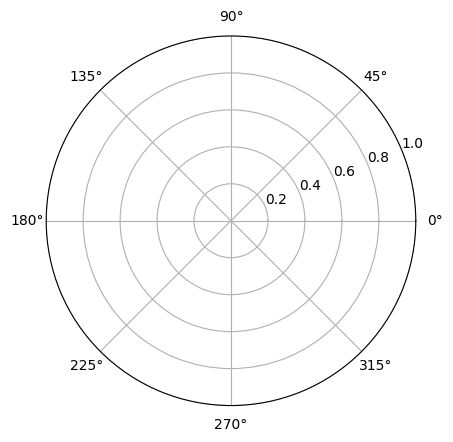

In [92]:
ax = plt.subplot(111, projection='polar')
ax.bar(time_series, grouped_df['Accident_Index'], width=0.1,    
       alpha=0.3, color='red')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)

In [96]:
data['hour'] = pd.to_datetime(data['Time']).dt.hour

In [98]:
hourly_counts = data.groupby('hour')['Alert'].count().reset_index()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (17,).

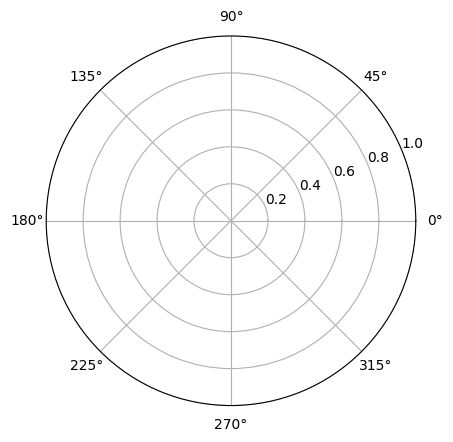

In [99]:
# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours (12 or 24 based on your preference)
num_hours = 12

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts['Alert'], width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in range(num_hours)]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency by Hour")
plt.show()


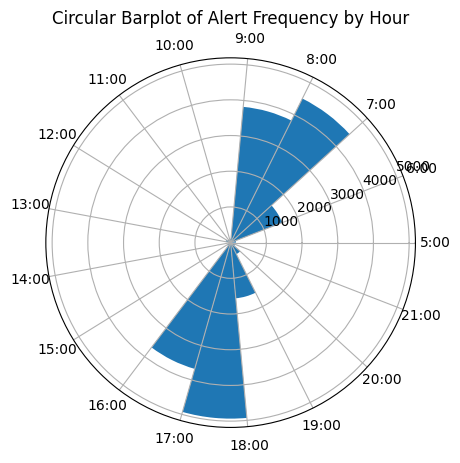

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency by Hour")
plt.show()


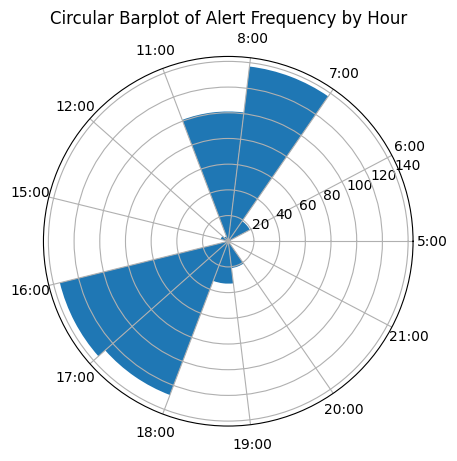

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv(r"cas_fcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Set the number of hours based on the unique hours in your dataset
num_hours = len(hourly_counts)

# Create evenly spaced angles for the hours
angles = np.linspace(0, 2 * np.pi, num_hours, endpoint=False).tolist()

# Plot the bars
ax.bar(angles, hourly_counts, width=2 * np.pi / num_hours, align='edge')

# Set the labels for the hours
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
ax.set_xticks(angles)
ax.set_xticklabels(hour_labels)

# Set the title and display the plot
plt.title("Circular Barplot of Alert Frequency by Hour")
plt.show()


In [103]:
data = pd.read_csv(r"cas_fcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()
hourly_counts

5       2
6      19
7     137
8     101
11      4
12      6
15      2
16    135
17    128
18     33
19     21
20      1
21      1
Name: hour, dtype: int64

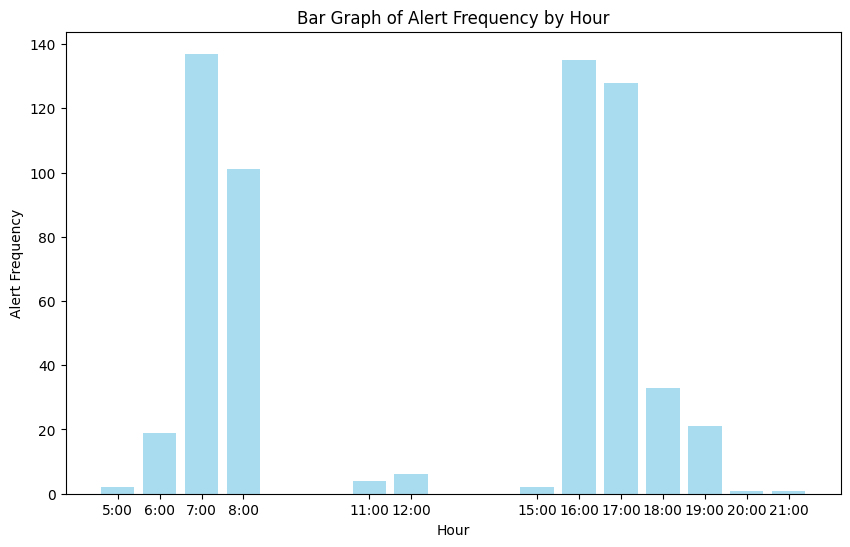

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Extract the hour component from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour

# Calculate the frequency of alerts for each hour
hourly_counts = data['hour'].value_counts().sort_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', alpha=0.7)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency by Hour')

# Customize the x-axis tick labels (if needed)
hour_labels = [str(hour) + ":00" for hour in hourly_counts.index]
plt.xticks(hourly_counts.index, hour_labels)

# Show the plot
plt.show()


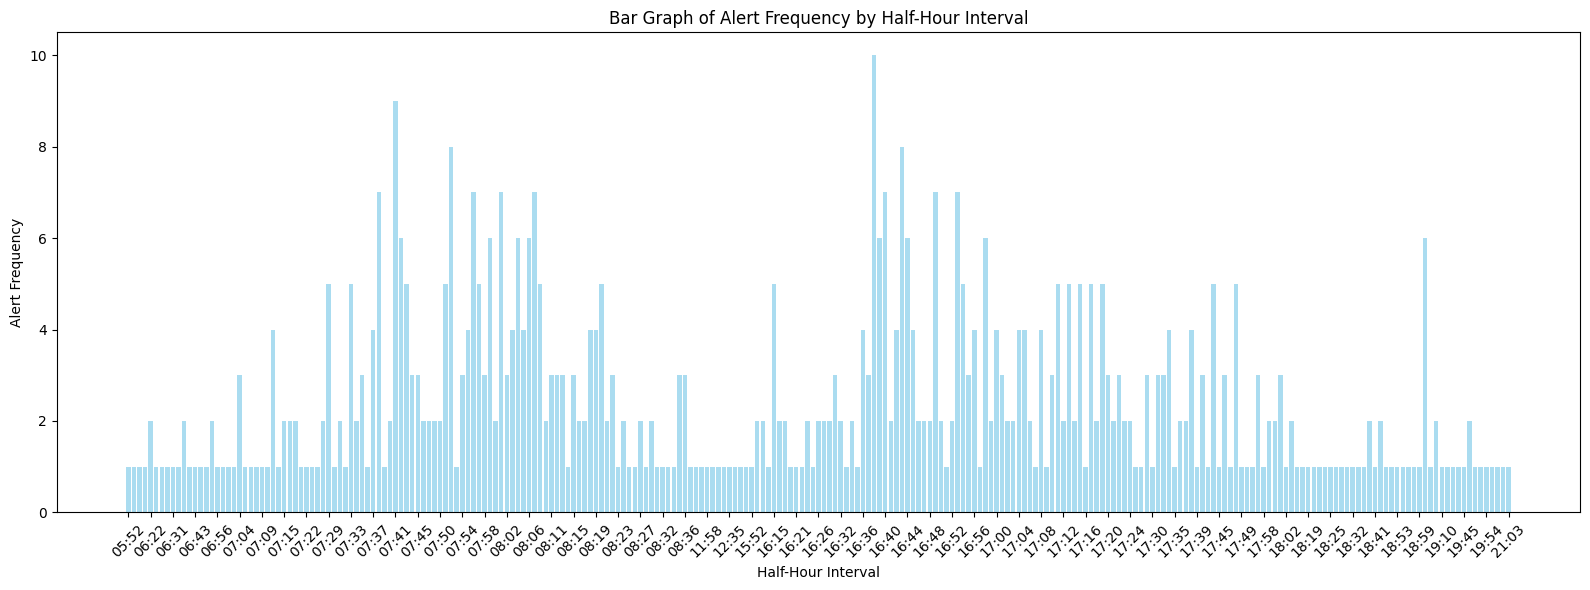

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Extract the hour and minute components from the time column
data['hour'] = pd.to_datetime(data['Time']).dt.hour
data['minute'] = pd.to_datetime(data['Time']).dt.minute

# Calculate the frequency of alerts for each half-hour interval
half_hourly_counts = data.groupby(['hour', 'minute']).size().reset_index(name='count')

# Create a figure and axis
plt.figure(figsize=(16, 6))

# Plot the bars
plt.bar(
    range(len(half_hourly_counts)),
    half_hourly_counts['count'],
    color='skyblue',
    alpha=0.7
)

# Set labels and title
plt.xlabel('Half-Hour Interval')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency by Half-Hour Interval')

# Customize the x-axis tick labels to include all half-hour intervals
half_hour_labels = [
    f"{hour:02d}:{minute:02d}" for hour, minute in zip(half_hourly_counts['hour'], half_hourly_counts['minute'])
]
plt.xticks(range(0, len(half_hourly_counts), 4), half_hour_labels[::4], rotation=45)


# Show the plot
plt.tight_layout()
plt.show()


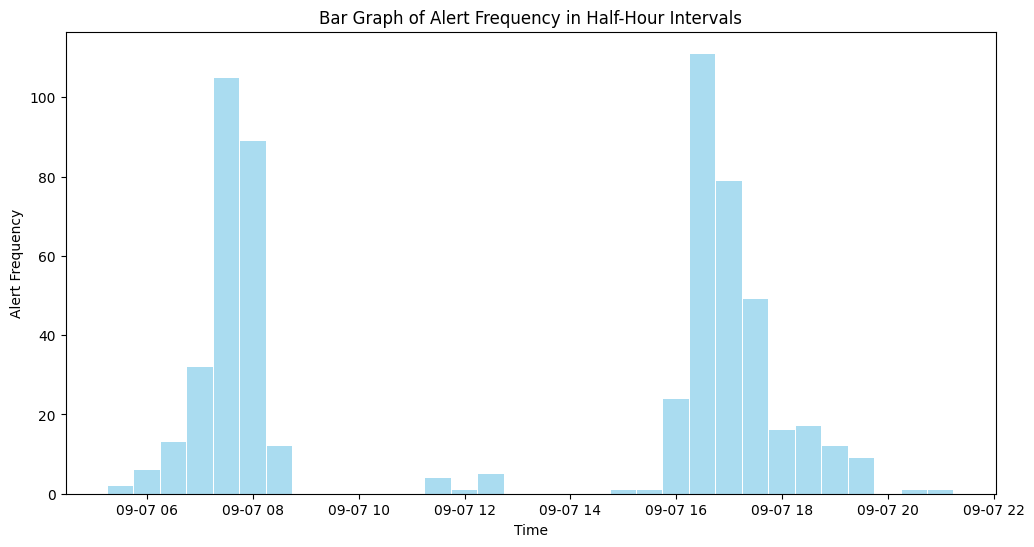

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency in Half-Hour Intervals')

# Show the plot
plt.show()


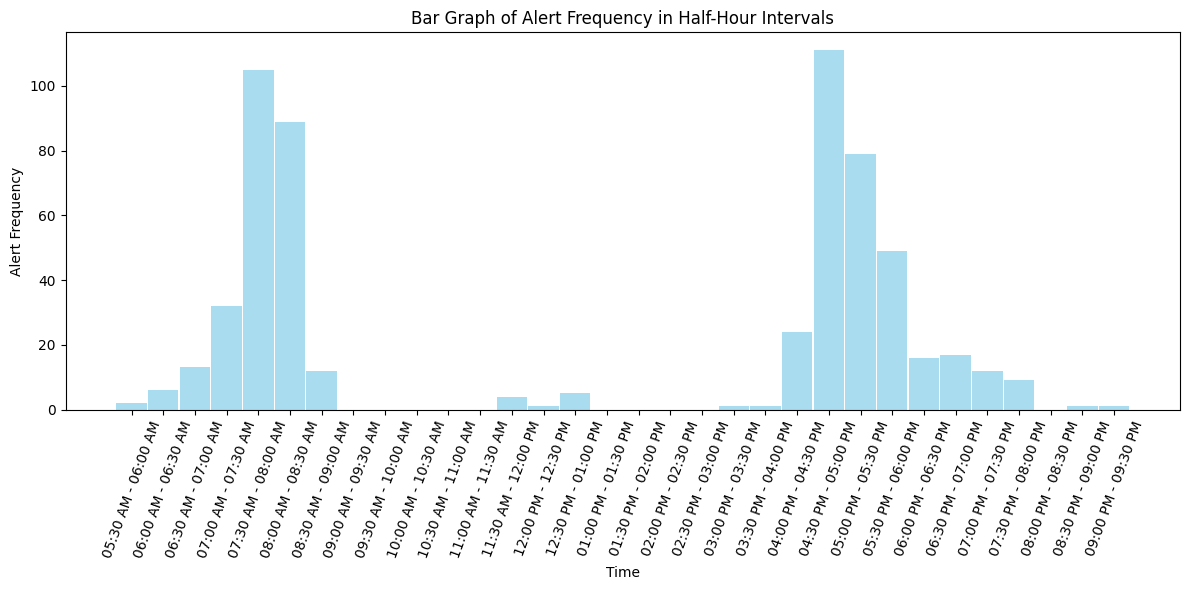

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency in Half-Hour Intervals')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


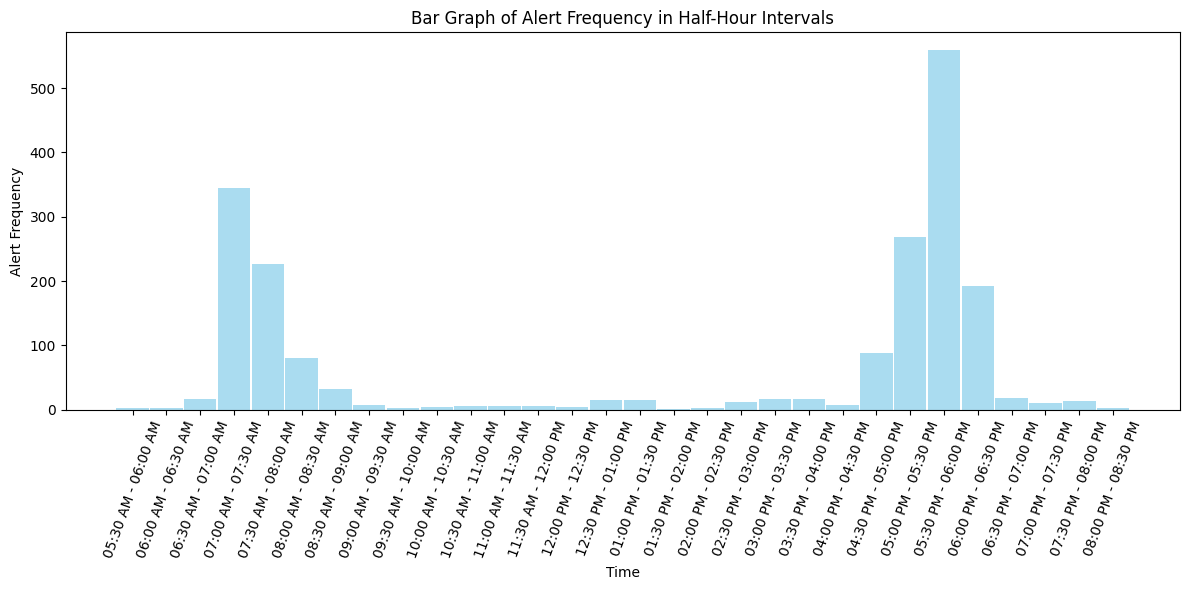

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_pcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency in Half-Hour Intervals')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


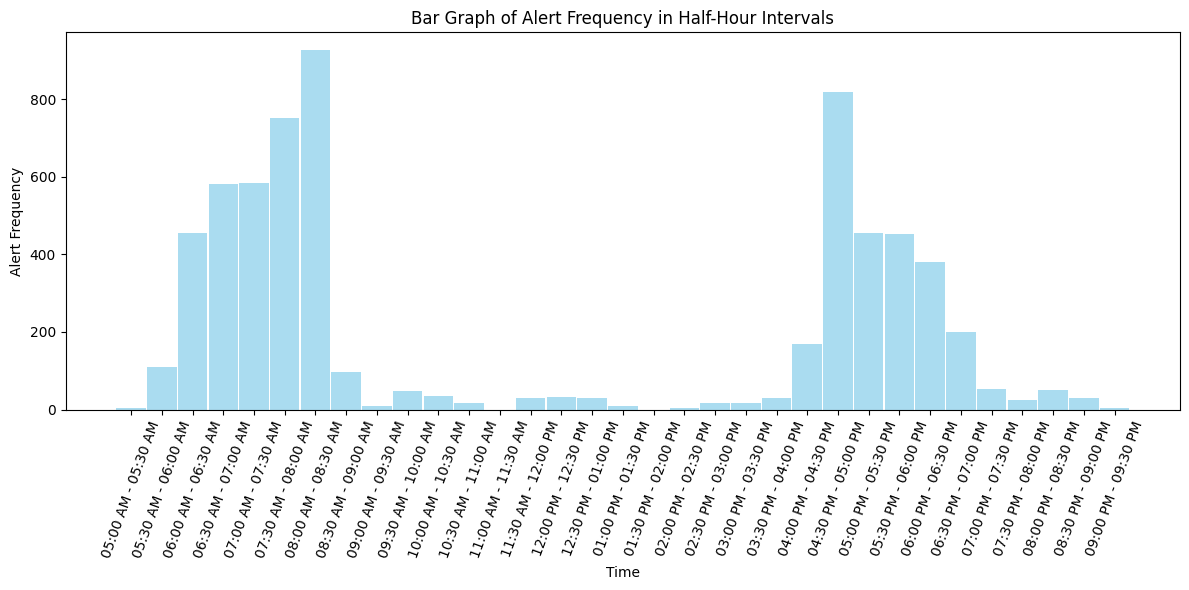

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_ldw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency in Half-Hour Intervals')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


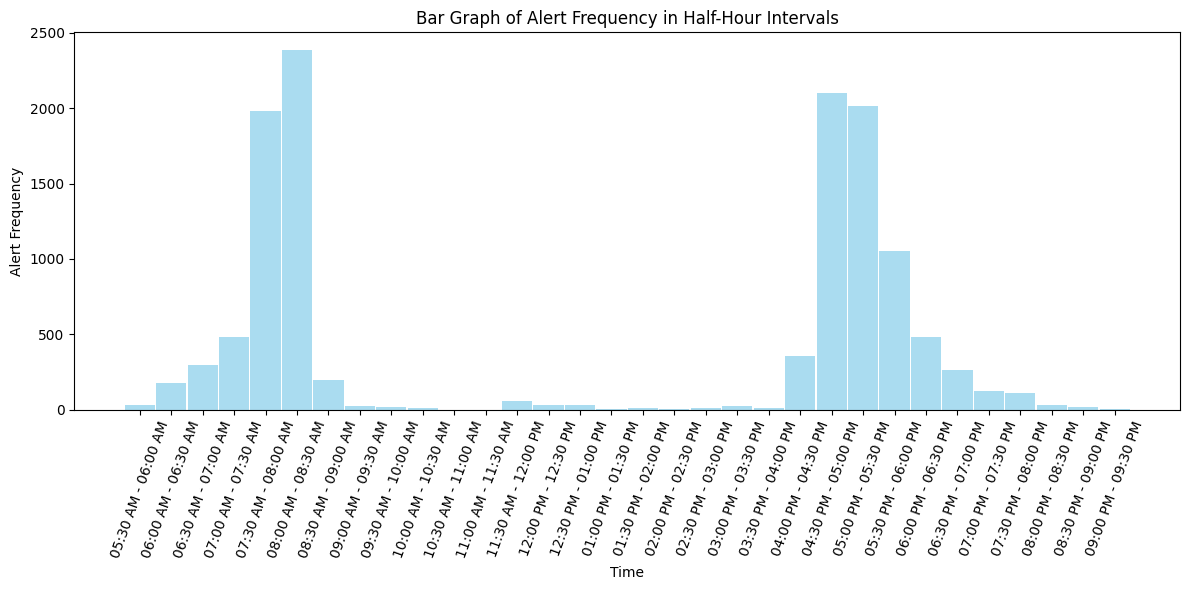

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_hmw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)

# Customize the x-axis tick labels
x_labels = [
    f"{interval.strftime('%I:%M %p')} - {(interval + pd.Timedelta(minutes=30)).strftime('%I:%M %p')}"
    for interval in half_hourly_counts.index
]

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Alert Frequency')
plt.title('Bar Graph of Alert Frequency in Half-Hour Intervals')

# Set the x-axis tick positions and labels
plt.xticks(half_hourly_counts.index, x_labels, rotation=70)

# Show the plot
plt.tight_layout()
plt.show()


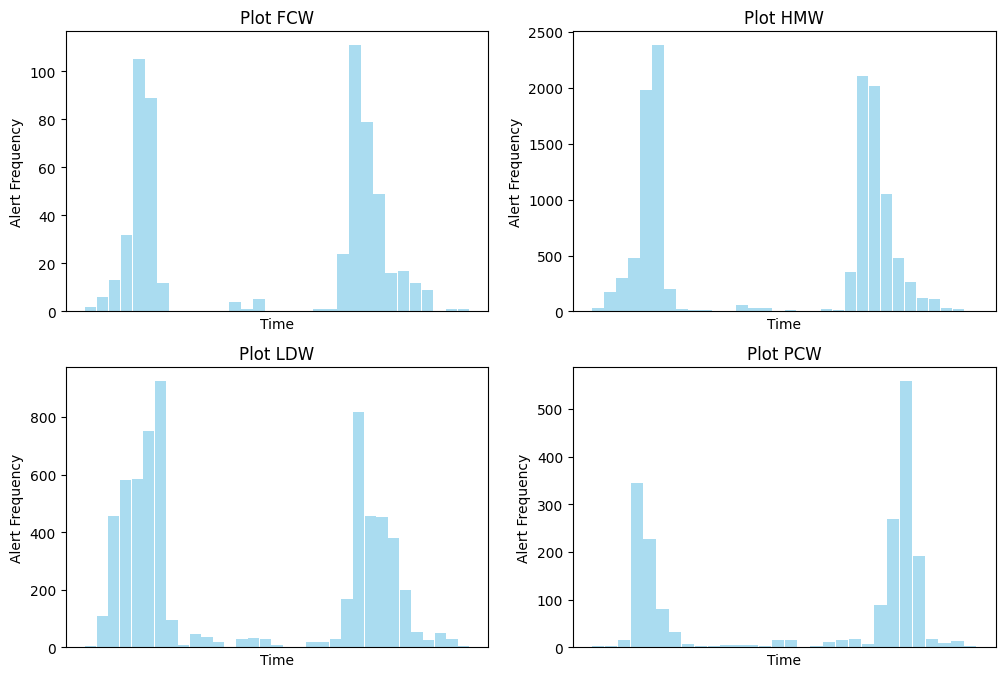

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("cas_fcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create four different plots (you can replace these with your actual plots)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1
axs[0, 0].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,
    color='skyblue',
    alpha=0.7
)

axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Alert Frequency')
axs[0, 0].set_title('Plot FCW')
axs[0, 0].set_xticks([])
# Plot 2
# Add your code for the second plot here
data = pd.read_csv("cas_hmw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
axs[0,1].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)
axs[0, 1].set_xlabel('Time')
axs[0, 1].set_ylabel('Alert Frequency')
axs[0, 1].set_title('Plot HMW')
# Customize the x-axis tick labels

axs[0, 1].set_xticks([])
# Plot 3
# Add your code for the third plot here
data = pd.read_csv("cas_ldw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
axs[1,0].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Alert Frequency')
axs[1, 0].set_title('Plot LDW')
axs[1, 0].set_xticks([])
# Plot 4
# Add your code for the fourth plot here
data = pd.read_csv("cas_pcw.csv")

# Convert the 'time' column to a datetime object
data['Time'] = pd.to_datetime(data['Time'])

# Set the 'time' column as the DataFrame's index
data.set_index('Time', inplace=True)

# Resample the data in half-hour intervals and count the alerts in each interval
half_hourly_counts = data['Alert'].resample('30T').count()

# Create a bar graph
plt.figure(figsize=(12, 6))
axs[1,1].bar(
    half_hourly_counts.index,
    half_hourly_counts.values,
    width=0.02,  # Adjust the bar width as needed
    color='skyblue',
    alpha=0.7
)
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Alert Frequency')
axs[1, 1].set_title('Plot PCW')
axs[1, 1].set_xticks([])
# Adjust spacing between subplots
plt.tight_layout()

# Show all plots together
plt.show()
